# Setting up Analysis


In [164]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [165]:
df = pd.read_csv("intermediate\soc_econ_data.csv", index_col=0)
df2 = pd.read_csv("intermediate\war_data.csv", index_col=0)

df = df2.merge(df, on = "Region", how = 'left').reset_index(drop=True)

df

,Region,Excess 2022,Excess 2023,Male pop2022,Male pop2023,Excess per100k (2022),Excess per100k (2023),Total,Drafted,Volunteers,Prisoners,PMC,Excess total,Excessive Marriages,Excessive Marriages per100k,pmgrowth,% Russians,unemp,median_income,share_poverty
0,Алтайский край,128.246418,244.472443,584819.0,576369.0,21.929250,42.415960,350.706800,40.183373,99.517971,49.246006,8.891640,64.345209,2007.6,343.285700,24.513939,95.45,5.5,20783.2,16.5
1,Амурская область,504.416315,148.047794,228799.0,226425.0,220.462640,65.384915,221.591878,20.542048,39.772901,37.150512,1.748259,285.847555,1890.4,826.227387,32.131201,95.17,5.2,30522.8,14.2
2,Архангельская область без АО,-96.315932,292.762215,276243.0,272674.0,-34.866379,107.367118,447.794152,63.350022,128.872044,92.310031,13.032004,72.500739,684.2,247.680484,16.962484,97.44,6.6,30605.6,11.7
3,Астраханская область,297.114738,150.377799,273148.0,270504.0,108.774268,55.591710,381.844275,34.779680,94.820390,84.935639,5.491528,164.365978,172.8,63.262407,26.216914,67.10,7.7,21812.2,15.5
4,Белгородская область,355.700355,184.568346,442249.0,433216.0,80.429883,42.604231,264.330728,38.666000,62.408281,25.777334,13.793135,123.034115,1182.4,267.360695,17.172315,95.29,4.2,28019.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Чувашская Республика,-248.799524,270.080898,334430.0,328223.0,-74.395097,82.285793,284.364441,26.014413,82.827498,32.592770,5.382292,7.890696,185.6,55.497414,29.281299,30.70,4.8,19390.1,15.7
81,Чукотский АО,1.974285,61.091478,16398.0,16096.0,12.039790,379.544470,695.206733,97.572875,384.193194,85.376265,NaN,391.584260,69.4,423.222344,NaN,54.21,2.6,74821.5,7.3
82,Якутия,60.135241,123.586523,309111.0,307385.0,19.454255,40.205776,389.180586,76.994995,106.434258,57.584492,6.470168,59.660030,850.0,274.982126,20.884603,32.63,6.9,38296.0,16.3
83,Ямало-Hенецкий АО,-57.060639,153.619495,167641.0,165779.0,-34.037401,92.665232,297.659880,29.825639,96.038559,42.352408,4.175590,58.627831,386.2,230.373238,23.364343,62.89,2.1,68995.9,4.6


# Total (confirmed) deaths

In [166]:
df_model = df[['Total', 'Excessive Marriages per100k', 'share_poverty', '% Russians']].copy()
df_model["poverty_x_marriage"] = df_model['share_poverty']*df_model["Excessive Marriages per100k"]
df_model["rus_x_marriage"] = df_model['% Russians']*df_model["Excessive Marriages per100k"]

df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

X = df_model.drop(columns=['Total', 'poverty_x_marriage', 'rus_x_marriage'])
y = df_model['Total']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     17.28
Date:                 Пт, 06 июн 2025   Prob (F-statistic):           9.13e-09
Time:                        23:45:19   Log-Likelihood:                -544.24
No. Observations:                  85   AIC:                             1096.
Df Residuals:                      81   BIC:                             1106.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [167]:
X = df_model.drop(columns=['Total', 'poverty_x_marriage'])
y = df_model['Total']

X_const = sm.add_constant(X)
model2 = sm.OLS(y, X_const).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     28.40
Date:                 Пт, 06 июн 2025   Prob (F-statistic):           1.08e-14
Time:                        23:45:20   Log-Likelihood:                -527.70
No. Observations:                  85   AIC:                             1065.
Df Residuals:                      80   BIC:                             1078.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [168]:
X = df_model.drop(columns=['Total', 'rus_x_marriage'])
y = df_model['Total']

X_const = sm.add_constant(X)
model3 = sm.OLS(y, X_const).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     18.49
Date:                 Пт, 06 июн 2025   Prob (F-statistic):           8.54e-11
Time:                        23:45:20   Log-Likelihood:                -537.44
No. Observations:                  85   AIC:                             1085.
Df Residuals:                      80   BIC:                             1097.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

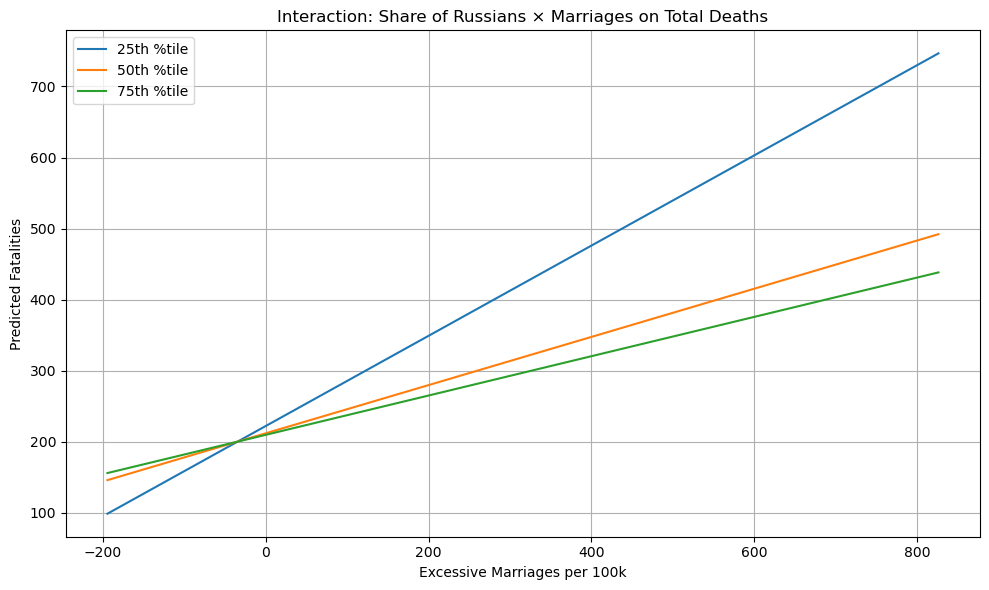

In [169]:
marriage_range = np.linspace(
    df_model['Excessive Marriages per100k'].min(),
    df_model['Excessive Marriages per100k'].max(), 100
)

rus_levels = np.percentile(df_model['% Russians'], [25, 50, 75])
rus_labels = ['25th %tile', '50th %tile', '75th %tile']
fixed_poverty_share = df_model['share_poverty'].median()

predictions = []

exog_names = model2.model.exog_names

for p, label in zip(rus_levels, rus_labels):
    temp = pd.DataFrame({
        'Excessive Marriages per100k': marriage_range,
        '% Russians': p,
        'share_poverty': fixed_poverty_share, 
        'rus_x_marriage': marriage_range * p,
        'const' : 1
    })

    temp = temp[exog_names]
    y_pred = model2.predict(temp)
    predictions.append((marriage_range, y_pred, label))

plt.figure(figsize=(10, 6))
for x, y_pred, label in predictions:
    plt.plot(x, y_pred, label=label)

plt.xlabel('Excessive Marriages per 100k')
plt.ylabel('Predicted Fatalities')
plt.title('Interaction: Share of Russians × Marriages on Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


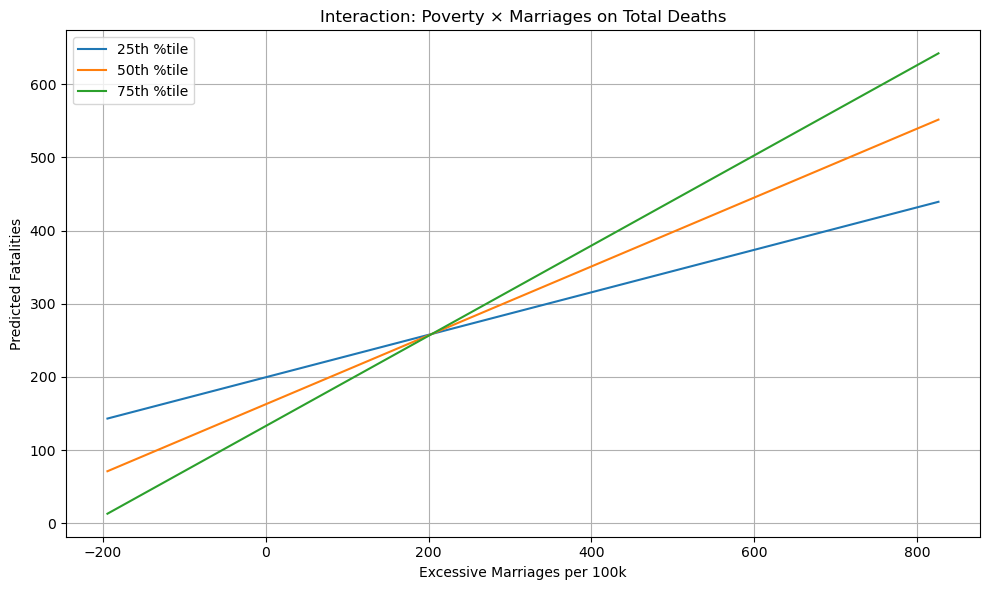

In [170]:
marriage_range = np.linspace(
    df_model['Excessive Marriages per100k'].min(),
    df_model['Excessive Marriages per100k'].max(), 100
)

poverty_levels = np.percentile(df_model['share_poverty'], [25, 50, 75])
poverty_labels = ['25th %tile', '50th %tile', '75th %tile']
fixed_russian_share = df_model['% Russians'].median()

predictions = []

exog_names = model3.model.exog_names

for p, label in zip(poverty_levels, poverty_labels):
    temp = pd.DataFrame({
        'Excessive Marriages per100k': marriage_range,
        'share_poverty': p,
        '% Russians': fixed_russian_share, 
        'poverty_x_marriage': marriage_range * p,
        'const' : 1
    })

    temp = temp[exog_names]
    y_pred = model3.predict(temp)
    predictions.append((marriage_range, y_pred, label))

plt.figure(figsize=(10, 6))
for x, y_pred, label in predictions:
    plt.plot(x, y_pred, label=label)

plt.xlabel('Excessive Marriages per 100k')
plt.ylabel('Predicted Fatalities')
plt.title('Interaction: Poverty × Marriages on Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Drafted soldiers (confirmed) deaths only

In [171]:
df_model = df[['Drafted', 'Excessive Marriages per100k', 'share_poverty', '% Russians']].copy()
df_model["poverty_x_marriage"] = df_model['share_poverty']*df_model["Excessive Marriages per100k"]
df_model["rus_x_marriage"] = df_model['% Russians']*df_model["Excessive Marriages per100k"]

df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

X = df_model.drop(columns=['Drafted', 'poverty_x_marriage', 'rus_x_marriage'])
y = df_model['Drafted']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Drafted   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     5.890
Date:                 Пт, 06 июн 2025   Prob (F-statistic):            0.00110
Time:                        23:45:22   Log-Likelihood:                -377.82
No. Observations:                  84   AIC:                             763.6
Df Residuals:                      80   BIC:                             773.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [172]:
X = df_model.drop(columns=['Drafted', 'poverty_x_marriage'])
y = df_model['Drafted']

X_const = sm.add_constant(X)
model2 = sm.OLS(y, X_const).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Drafted   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     7.604
Date:                 Пт, 06 июн 2025   Prob (F-statistic):           3.10e-05
Time:                        23:45:22   Log-Likelihood:                -372.53
No. Observations:                  84   AIC:                             755.1
Df Residuals:                      79   BIC:                             767.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

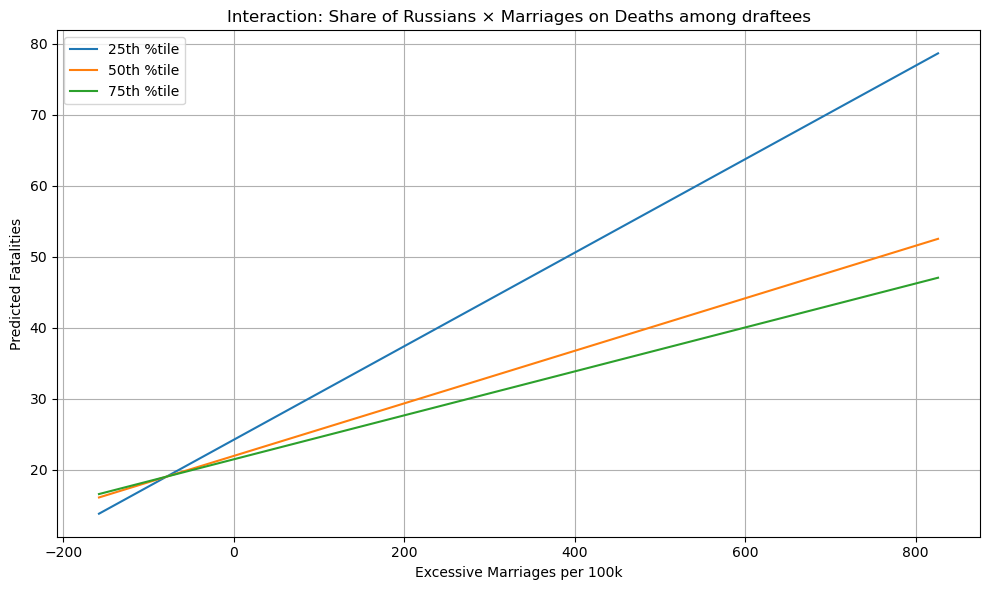

In [173]:
marriage_range = np.linspace(
    df_model['Excessive Marriages per100k'].min(),
    df_model['Excessive Marriages per100k'].max(), 100
)

rus_levels = np.percentile(df_model['% Russians'], [25, 50, 75])
rus_labels = ['25th %tile', '50th %tile', '75th %tile']
fixed_poverty_share = df_model['share_poverty'].median()

predictions = []

exog_names = model2.model.exog_names

for p, label in zip(rus_levels, rus_labels):
    temp = pd.DataFrame({
        'Excessive Marriages per100k': marriage_range,
        '% Russians': p,
        'share_poverty': fixed_poverty_share, 
        'rus_x_marriage': marriage_range * p,
        'const' : 1
    })

    temp = temp[exog_names]
    y_pred = model2.predict(temp)
    predictions.append((marriage_range, y_pred, label))

plt.figure(figsize=(10, 6))
for x, y_pred, label in predictions:
    plt.plot(x, y_pred, label=label)

plt.xlabel('Excessive Marriages per 100k')
plt.ylabel('Predicted Fatalities')
plt.title('Interaction: Share of Russians × Marriages on Deaths among draftees')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [174]:
X = df_model.drop(columns=['Drafted', 'rus_x_marriage'])
y = df_model['Drafted']

X_const = sm.add_constant(X)
model3 = sm.OLS(y, X_const).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                Drafted   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     4.981
Date:                 Пт, 06 июн 2025   Prob (F-statistic):            0.00124
Time:                        23:45:23   Log-Likelihood:                -376.76
No. Observations:                  84   AIC:                             763.5
Df Residuals:                      79   BIC:                             775.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

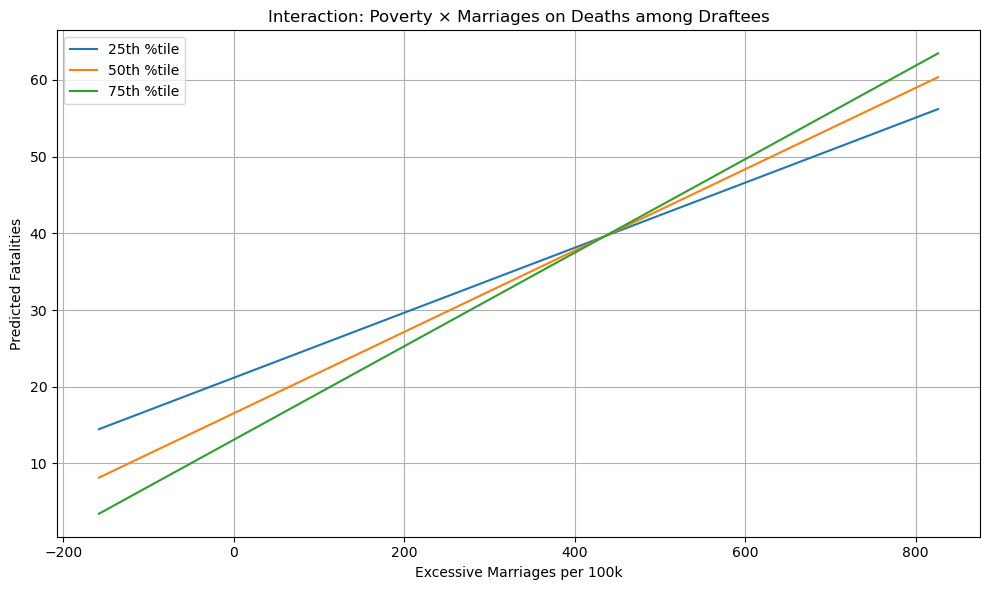

In [175]:
marriage_range = np.linspace(
    df_model['Excessive Marriages per100k'].min(),
    df_model['Excessive Marriages per100k'].max(), 100
)

poverty_levels = np.percentile(df_model['share_poverty'], [25, 50, 75])
poverty_labels = ['25th %tile', '50th %tile', '75th %tile']
fixed_russian_share = df_model['% Russians'].median()

predictions = []

exog_names = model3.model.exog_names

for p, label in zip(poverty_levels, poverty_labels):
    temp = pd.DataFrame({
        'Excessive Marriages per100k': marriage_range,
        'share_poverty': p,
        '% Russians': fixed_russian_share, 
        'poverty_x_marriage': marriage_range * p,
        'const' : 1
    })

    temp = temp[exog_names]
    y_pred = model3.predict(temp)
    predictions.append((marriage_range, y_pred, label))

plt.figure(figsize=(10, 6))
for x, y_pred, label in predictions:
    plt.plot(x, y_pred, label=label)

plt.xlabel('Excessive Marriages per 100k')
plt.ylabel('Predicted Fatalities')
plt.title('Interaction: Poverty × Marriages on Deaths among Draftees')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Deposits growth as a proxy for mobilization

In [176]:
df_model = df[['Total', 'pmgrowth', 'share_poverty', '% Russians']].copy()
df_model["poverty_x_dep"] = df_model['share_poverty']*df_model["pmgrowth"]
df_model["rus_x_dep"] = df_model['% Russians']*df_model["pmgrowth"]

df_model = df_model.replace([np.inf, -np.inf], np.nan).dropna()

X = df_model.drop(columns=['Total', 'poverty_x_dep', 'rus_x_dep'])
y = df_model['Total']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     7.590
Date:                 Пт, 06 июн 2025   Prob (F-statistic):           0.000157
Time:                        23:45:25   Log-Likelihood:                -546.61
No. Observations:                  84   AIC:                             1101.
Df Residuals:                      80   BIC:                             1111.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -162.5092    134.981     -1.204

In [177]:
X = df_model.drop(columns=['Total', 'poverty_x_dep'])
y = df_model['Total']

X_const = sm.add_constant(X)
model2 = sm.OLS(y, X_const).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     11.16
Date:                 Пт, 06 июн 2025   Prob (F-statistic):           3.16e-07
Time:                        23:45:25   Log-Likelihood:                -538.32
No. Observations:                  84   AIC:                             1087.
Df Residuals:                      79   BIC:                             1099.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -725.5660    183.112     -3.962

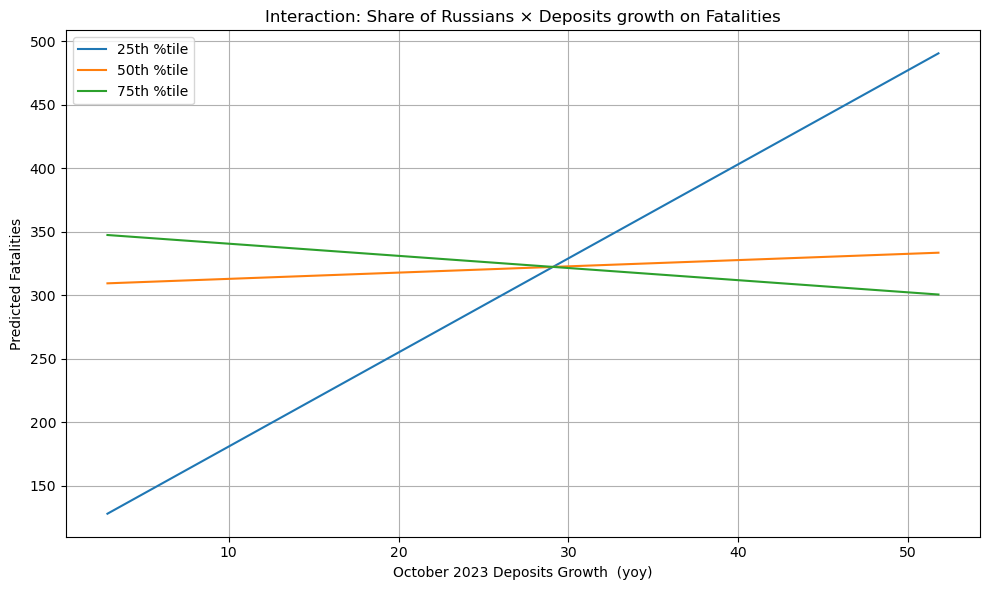

In [178]:
dep_range = np.linspace(
    df_model['pmgrowth'].min(),
    df_model['pmgrowth'].max(), 100
)

rus_levels = np.percentile(df_model['% Russians'], [25, 50, 75])
rus_labels = ['25th %tile', '50th %tile', '75th %tile']
fixed_poverty_share = df_model['share_poverty'].median()

predictions = []

exog_names = model2.model.exog_names

for p, label in zip(rus_levels, rus_labels):
    temp = pd.DataFrame({
        'pmgrowth': dep_range,
        '% Russians': p,
        'share_poverty': fixed_poverty_share, 
        'rus_x_dep': dep_range * p,
        'const' : 1
    })

    temp = temp[exog_names]
    y_pred = model2.predict(temp)
    predictions.append((dep_range, y_pred, label))

plt.figure(figsize=(10, 6))
for x, y_pred, label in predictions:
    plt.plot(x, y_pred, label=label)

plt.xlabel('October 2023 Deposits Growth  (yoy)')
plt.ylabel('Predicted Fatalities')
plt.title('Interaction: Share of Russians × Deposits growth on Fatalities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [179]:
X = df_model.drop(columns=['Total', 'rus_x_dep'])
y = df_model['Total']

X_const = sm.add_constant(X)
model3 = sm.OLS(y, X_const).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     16.63
Date:                 Пт, 06 июн 2025   Prob (F-statistic):           6.31e-10
Time:                        23:45:26   Log-Likelihood:                -531.47
No. Observations:                  84   AIC:                             1073.
Df Residuals:                      79   BIC:                             1085.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           559.8447    167.589      3.341

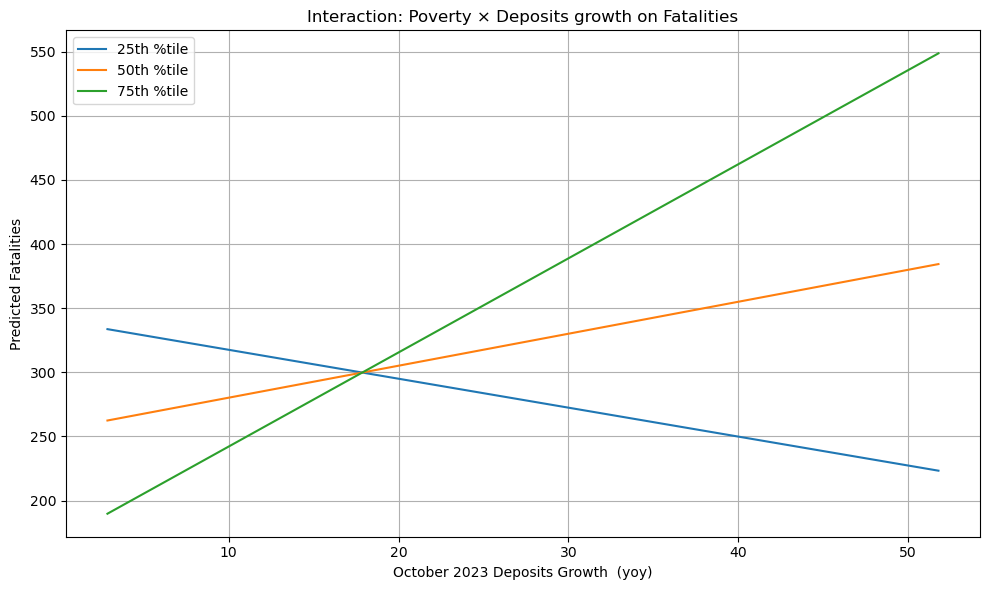

In [180]:
dep_range = np.linspace(
    df_model['pmgrowth'].min(),
    df_model['pmgrowth'].max(), 100
)

poverty_levels = np.percentile(df_model['share_poverty'], [25, 50, 75])
poverty_labels = ['25th %tile', '50th %tile', '75th %tile']
fixed_rus_share = df_model['% Russians'].median()

predictions = []

exog_names = model3.model.exog_names

for p, label in zip(poverty_levels, poverty_labels):
    temp = pd.DataFrame({
        'pmgrowth': dep_range,
        '% Russians': fixed_rus_share,
        'share_poverty': p, 
        'poverty_x_dep': dep_range * p,
        'const' : 1
    })

    temp = temp[exog_names]
    y_pred = model3.predict(temp)
    predictions.append((dep_range, y_pred, label))

plt.figure(figsize=(10, 6))
for x, y_pred, label in predictions:
    plt.plot(x, y_pred, label=label)

plt.xlabel('October 2023 Deposits Growth  (yoy)')
plt.ylabel('Predicted Fatalities')
plt.title('Interaction: Poverty × Deposits growth on Fatalities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
